In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree
import warnings
from sklearn.metrics import precision_recall_fscore_support

In [26]:
df = pd.read_csv('D:/Python/lpor_classification.csv')

In [27]:
print(df.head())

   Escola  Sexo  idade  TP_Moradia  Tamanho_Familia  Situacao_Pais  \
0       0     1     18           0                1              1   
1       0     1     17           0                1              0   
2       0     1     15           0                0              0   
3       0     1     15           0                1              0   
4       0     1     16           0                1              0   

   Educacao_Mae  Educacao_Pai  Trabalho_Mae  Trabalho_Pai  ...  \
0             4             4             3             0  ...   
1             1             1             3             4  ...   
2             1             1             3             4  ...   
3             4             2             1             2  ...   
4             3             3             4             4  ...   

   Esta_Namorando  Boa_Convivencia_Familia  Tempo_Livre_Apos_Escola  \
0               0                        4                        3   
1               0                       

In [28]:
print(df.isnull().sum())

Escola                     0
Sexo                       0
idade                      0
TP_Moradia                 0
Tamanho_Familia            0
Situacao_Pais              0
Educacao_Mae               0
Educacao_Pai               0
Trabalho_Mae               0
Trabalho_Pai               0
Motivo_Escolha_Escolar     0
Responsavel_Legal          0
Tempo_ida_Escola           0
Tempo_Estudo_Semanal       0
Apoio_Educacao_Extra       0
Apoio_Educacao_Pais        0
Aulas_Particulares         0
Ativ_Extracurricular       0
Frequentou_Creche          0
Quer_Fazer_Graduacao       0
Tem_Internet               0
Esta_Namorando             0
Boa_Convivencia_Familia    0
Tempo_Livre_Apos_Escola    0
Tempo_com_Amigos           0
Alcool_Dia_Util            0
Alcool_Fim_Semana          0
Estado_Saude               0
Falta_Escolar              0
Nota_1Semestre             0
Nota_2Semestre             0
dtype: int64


In [29]:
df.dropna(inplace=True)

In [35]:
X = df.drop('Esta_Namorando', axis=1)
y = df['Esta_Namorando']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = DecisionTreeClassifier(random_state=42)

In [38]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
y_pred = model.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5307692307692308
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.60      0.62        81
           1       0.38      0.41      0.40        49

    accuracy                           0.53       130
   macro avg       0.51      0.51      0.51       130
weighted avg       0.54      0.53      0.53       130

Confusion Matrix:
[[49 32]
 [29 20]]


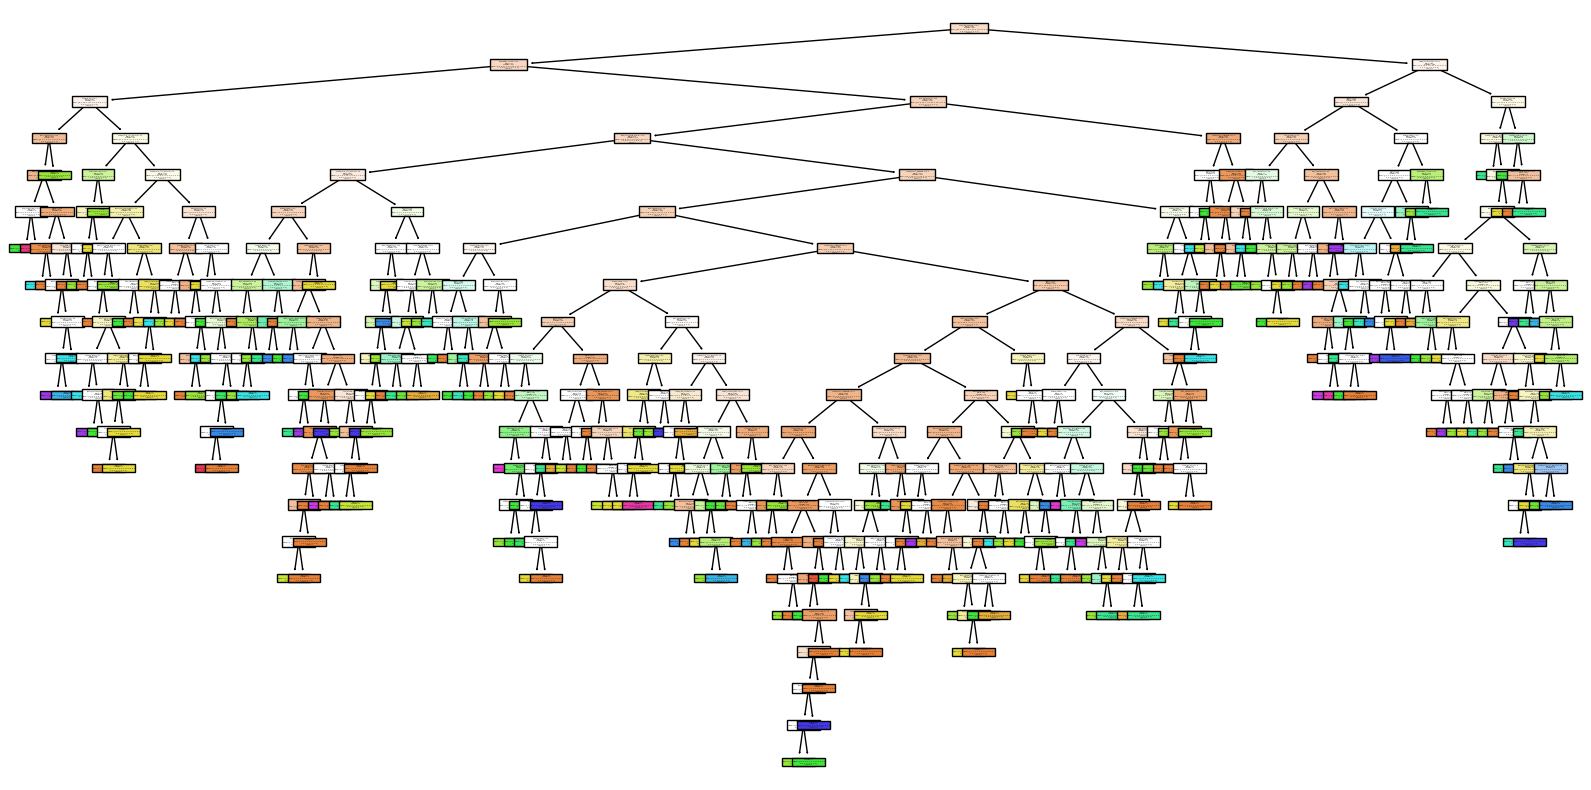

In [20]:
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.show()